# ADVERTISING SALES CHANNEL PREDICTION

## Importing Libreries

In [111]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing neccessory libreries

In [112]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Importing the dataset and see all columns with first five rows.

###### In advertising sales dataset 
###### Input variables are : tv, radio, newspaper
###### Target variable is : Sales

## Shape of data with number of rows and columns 

In [113]:
df.shape

(200, 5)

There are 200 Rows and 5 Columns in dataset

## Detailed description

In [114]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

## Datatypes of all columns 

In [115]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

all columns are having floting data types accept unnamed column. Unnamed column is having integer data type.

## Checking is there any null value 

In [116]:
#check is there any null value present in any column

df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no missing value in whole dataset.
As we see no null values present, it's safe to proceed.

In [117]:
df.loc[df['sales']== " "]

,Unnamed: 0,TV,radio,newspaper,sales


 As we see there are no missing or spaces are available in target variable.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1. Distplot

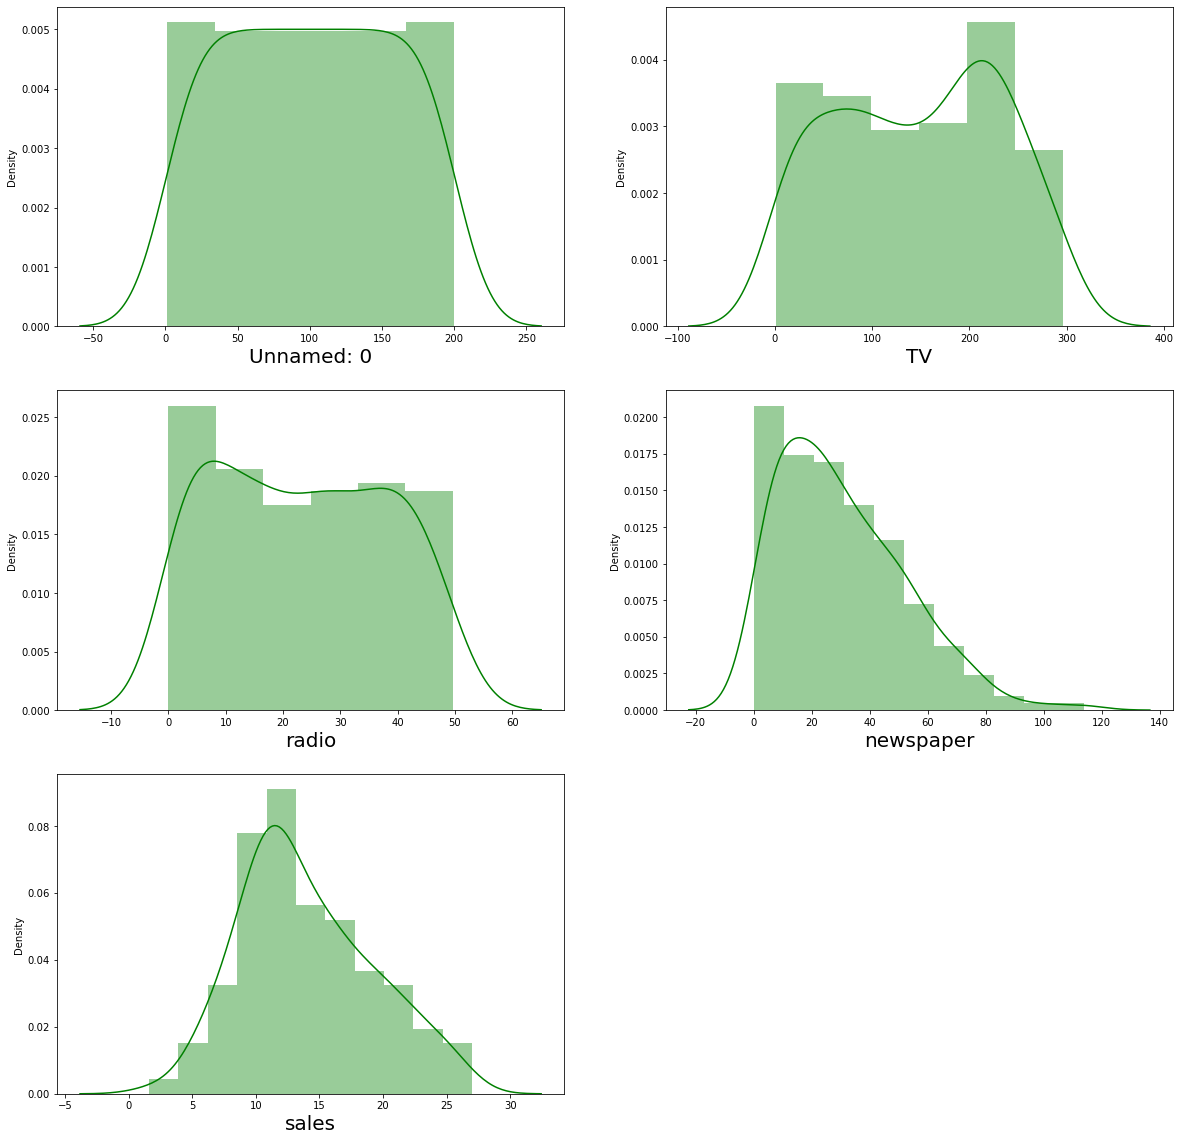

In [118]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
eda = 1

for column in df:
    if eda <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,eda)
        sn.distplot(df[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    eda += 1
plt.show()

As shown in distplot newspaper input variable is having skewness in it.other Data columns are almost normally distributed. So, we need remove skewness from that the input variable.

#### 2. Histplot

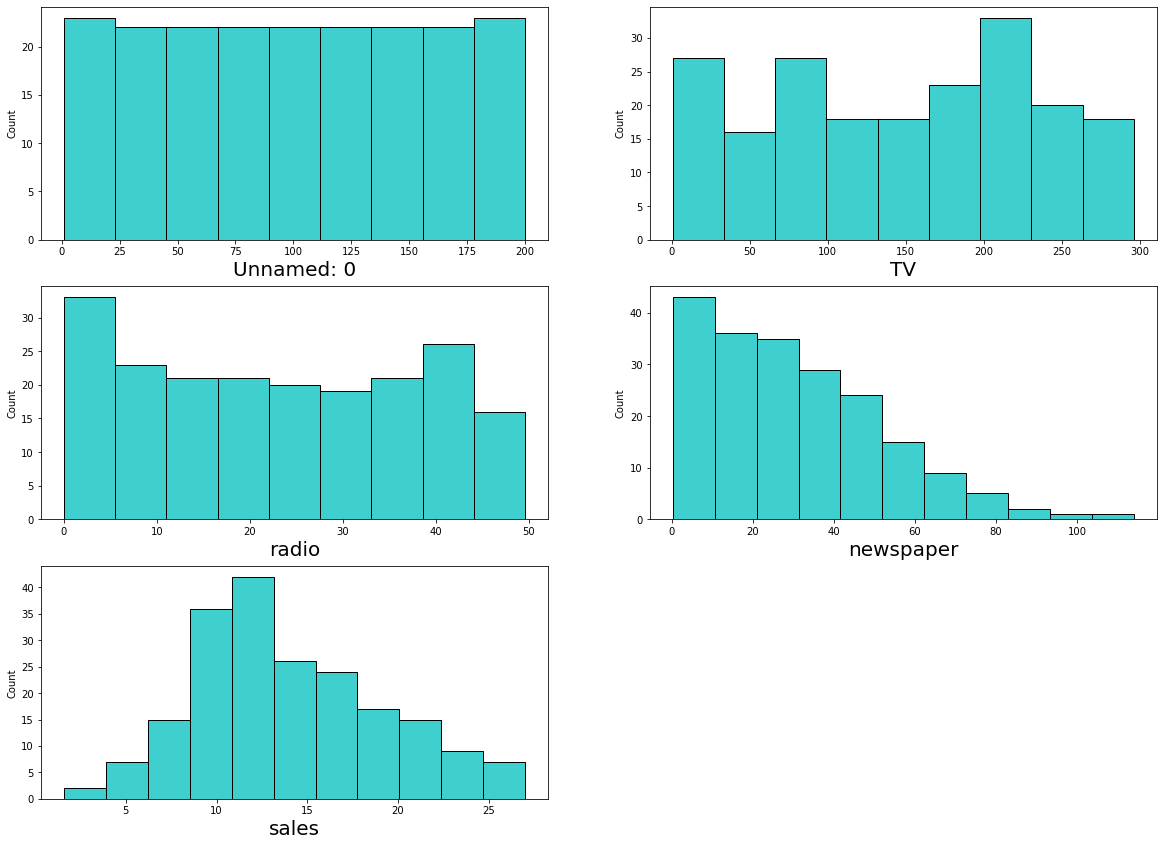

In [119]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.histplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

#### 3. Boxplot

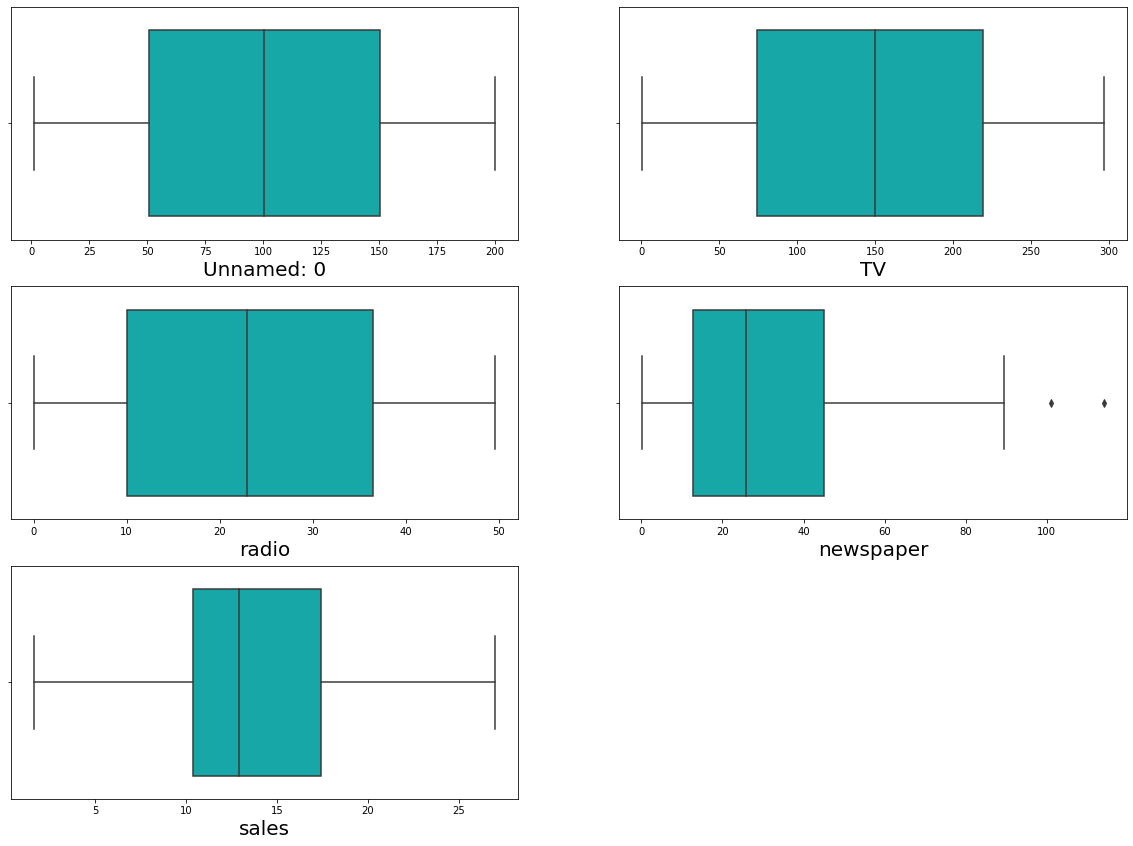

In [120]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

## Bi variate analysis
Bi variate analysis is works with two variables.

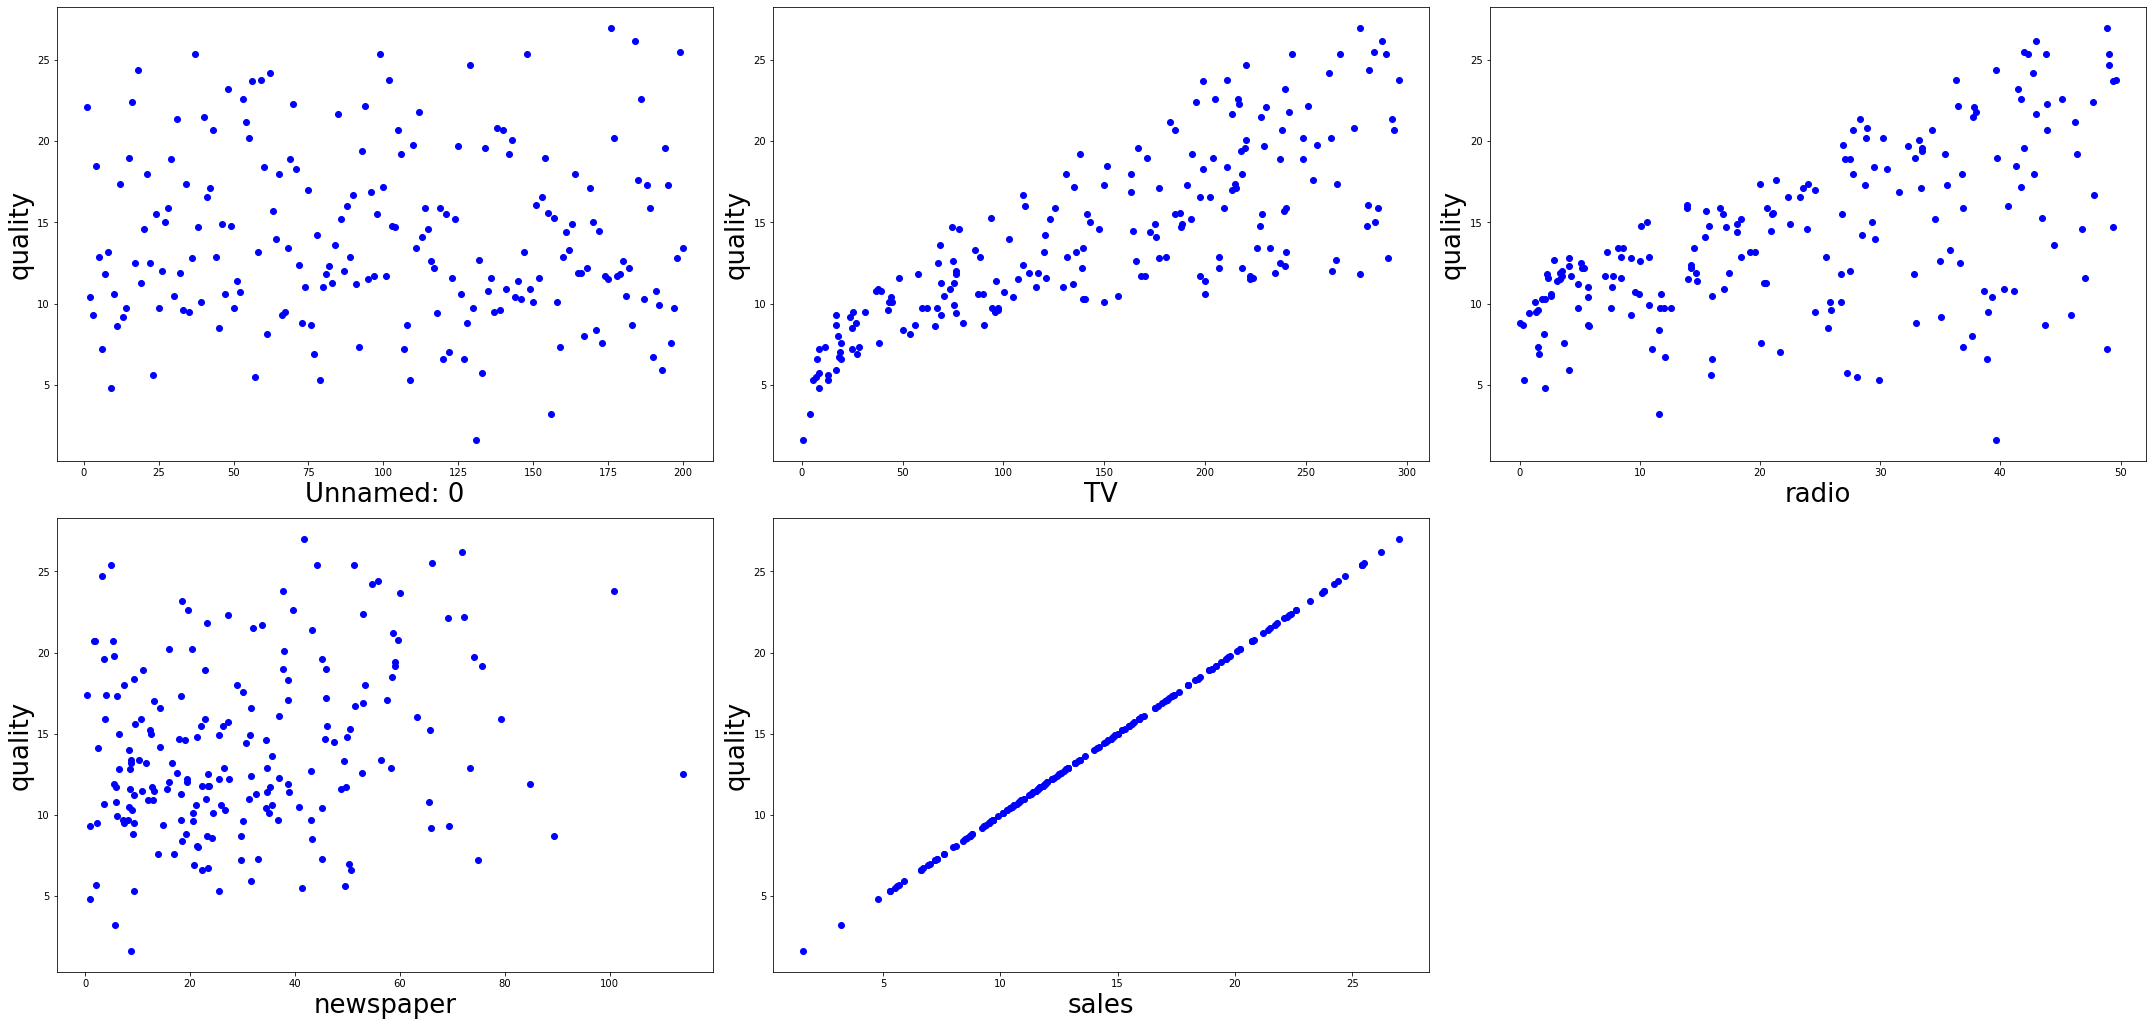

In [121]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['sales'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('quality', fontsize=26)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot TV and Radio is having almost linear relationship with target variable and newspaper is having non linear realationship with target variable(sales). 
and outliers are also present in newspaper column.

# Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

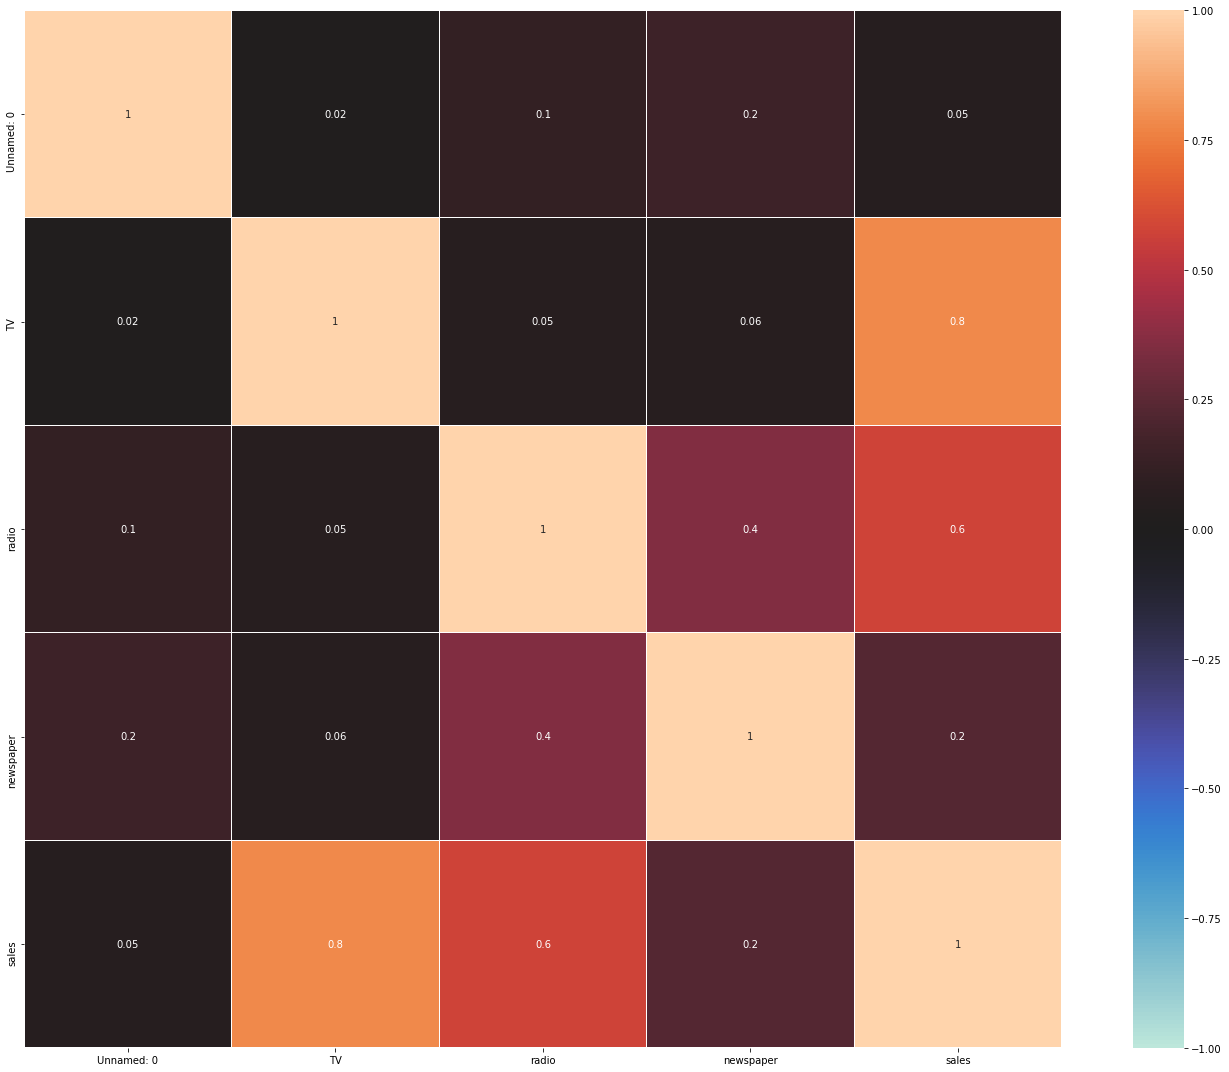

In [122]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap TV and sales are strongly correlated with each other and Unnamed column is weekly correlate with targate variable.

##### Find out which columns are positively and negatively correlated with each other

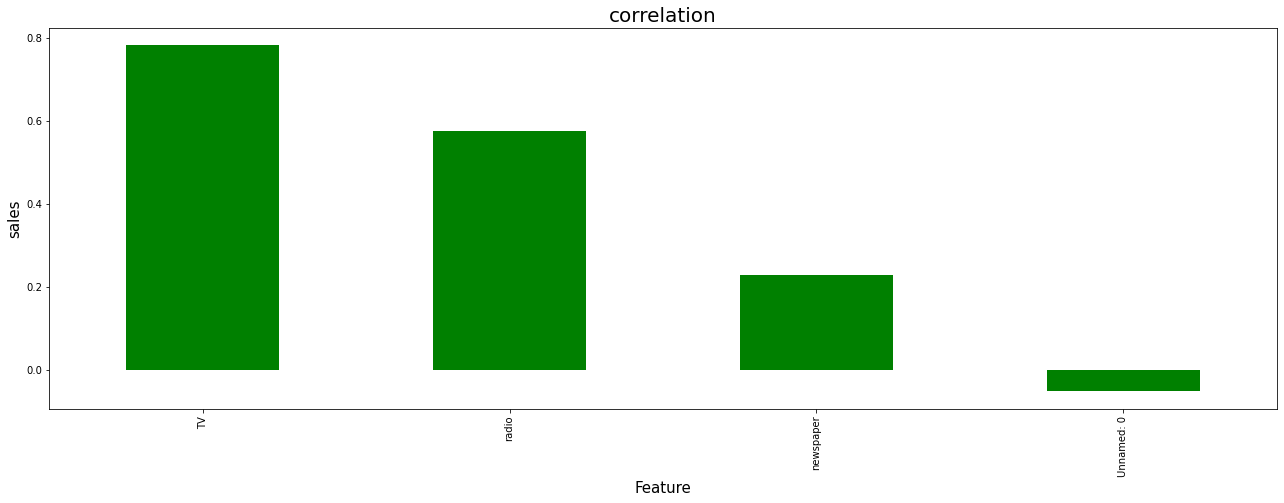

In [123]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('sales', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

Unnamed column is weekly correlate with targate variable.

#### After visualization we conclude that all input variable are having linear relationship with target variable accept newspaper ans unnamed variable.

## Drop Column

In [124]:
df=df.drop(['Unnamed: 0'], axis=1)

In [125]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Unnamed column is having poorly correlated with tagret variable. So, drop that column.

## Remove outliers 
As we see outliers present in newpaper column. So, remove outliers first

### 1. Outlier remove using zscore technique

In [126]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['TV', 'radio', 'newspaper']]) #Put contineuos/float input variable in z-score 
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (200, 4)
shape after          : (198, 4)
Percentage Loss      : 0.01


##### 1% data loss after using zscore technique
##### 99% data remains 
##### Now  we will chmuch data lost in IQR technique, use IQR method

## 2. Outlier Removing using IQR
### from boxplot in EDA, we came to know that outliers present in following columns.
#### Visualize data again to check outliers are present at low side or high side

In [127]:
df2 = df

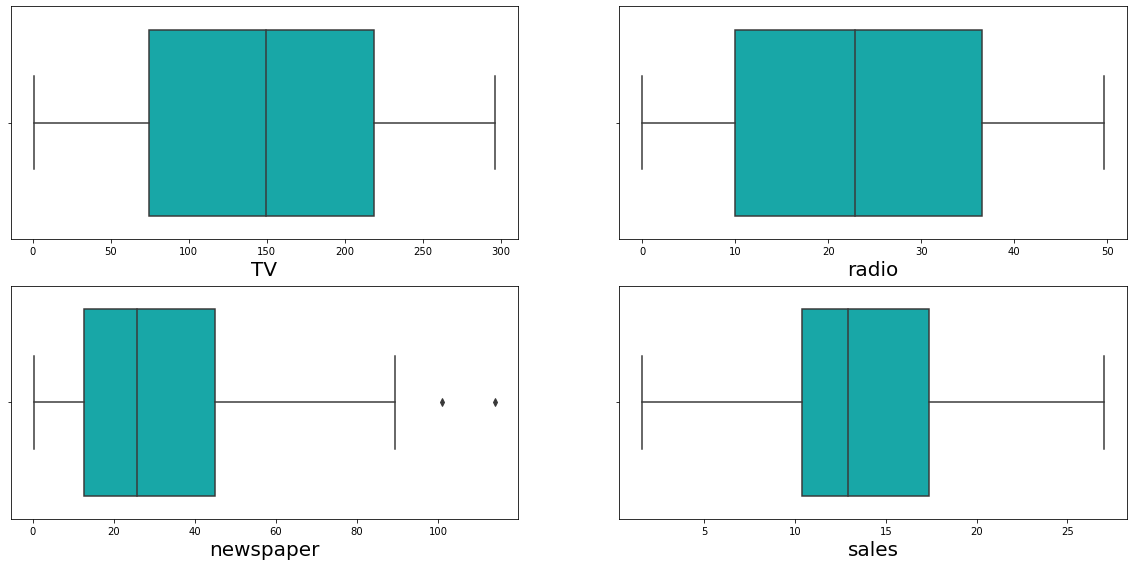

In [128]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in plot outliers is present only in newspaper column, so remove it first.

In [129]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [130]:
df2.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Outlier detection formula 
#### Higher side ==> Q3 + (1.5 * IQR)
as outliers present in higher side only so we will go with higher side formula

In [131]:
#as shown in boxplot we have outlier in higher side of newspaper
#Remove outliers from higher side so, use higher side formula

newspaper_out = (q3.newspaper + (1.5*(iqr.newspaper)))
newspaper_out

93.625

In [132]:
index_out = np.where(df2['newspaper'] > newspaper_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


In [133]:
(200-198)/200

0.01

In [134]:
print("Data loss in IQR method is: 1%")
print("98% data remains in after applying it.")

Data loss in IQR method is: 1%
98% data remains in after applying it.


###### As if we compare in both the techniques only 1 % data lost. Now check the skewness and we can use any methods or data set to proceed further.

## Check the skewness and remove that

In [135]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

As we see there are newspaper variable is skewed, whoes value is not lies between -0.5 to +0.5 this range.

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [136]:
new_df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### Apply Log transformation/Powertransformation to remove skewness

In [137]:
new_df['newspaper'] = new_df['newspaper'].replace(0,new_df['newspaper'].mean())

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

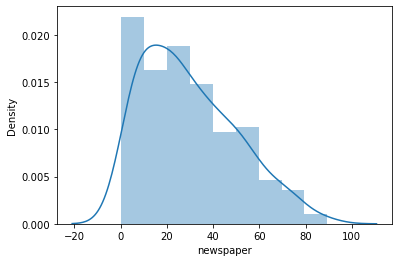

In [138]:
sn.distplot(new_df['newspaper'])

As shown in plot skewness removes after using power transformation skewness removal.

## Seperating the columns into featuers and target:
#### X= features, y=Target 

In [139]:
x = new_df.drop(columns = 'sales', axis=1)
y = new_df['sales']

## Scalling technique

In [140]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [141]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


as we have saw in the table vif value is not greater than 5. so no need to drop any column to avoid multiclinearity issue.

## Finding best random state

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [143]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.977994615545895 on Random_state  155


In [144]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 155)

## 1.Linear Regression Model

In [145]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [146]:
pred_test=Lr.predict(x_test)

In [147]:
print(r2_score(y_test,pred_test))

0.8920105387725492


## Cross Validation of Linear Regression 

In [148]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8853605756683912

## Regularization

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [150]:
ls = Lasso(alpha = 0.01, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.892014198099563

In [151]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8853770981026997

###### The r2 score for linear regression model is : 89.20%
###### Cross validation score for linear regression is : 88.53%

In [152]:
#calculate the differece between r2 score and cross validation score 
89.20-88.53

0.6700000000000017

# 2.Random Forest Regression

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [154]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  97.8823946374441
Cross Val Score:  97.44680871824087


###### The r2 score for Random Forest Regressor model is : 97.88%
###### Cross validation score for Random Forest Regressor is : 97.44%

In [164]:
#calculate the differece between r2 score and cross validation score 
97.88-97.44

0.4399999999999977

## 3.Support Vector Regression

In [156]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [157]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

0.8619118351054175


In [158]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8415472179655342

##### The r2 score for SVR model is : 86.19%
##### Cross validation score for SVR is : 84.15%

In [159]:
#calculate the differece between r2 score and cross validation score 
86.19-84.15

2.039999999999992

## 4.Decision Tree Regression

In [170]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [171]:
pred_dt = dt.predict(x_test)
print(r2_score(y_test,pred_dt))

0.969539123954561


In [172]:
cv_score= cross_val_score(dt, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9523000108690896

##### The r2 score for Decision Tree Regression model is : 96.95%
##### Cross validation score for Decision Tree Regression is : 95.23%

In [174]:
#calculate the differece between r2 score and cross validation score 
96.95-95.23

1.7199999999999989

## Compare all models

###### The diffrence between r2 score and cross validation score of linear regression model is : 0.67%
###### The diffrence between r2 score and cross validation score of Random Forest Regressor model is : 0.439%
###### The diffrence between r2 score and cross validation score of SVR model is : 2.04%
###### The diffrence between r2 score and cross validation score of Decision Tree Regression model is : 1.71%

### So, after comparison we conclude that the best model is Random Forest Regressor. Proceed further with that,

# Hyper parameter tunning

In [165]:
#Random forest Regression
# see all the parameters of random forest Regressor
Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [166]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [167]:
GCV.fit(x_train, y_train) 
#fit the all parameters in grid search cv and see the output

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [168]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 700}

In [169]:
mod = RandomForestRegressor( criterion='mae', max_depth=8 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

98.02157729979218


### after hyper parameter tunning the r2 score raise : 98.02%

# Saving the model

In [175]:
import joblib
joblib.dump(mod,"AdvertisingSalesChannelPrediction.pkl")

['AdvertisingSalesChannelPrediction.pkl']

### Loding model

In [176]:
model = joblib.load("AdvertisingSalesChannelPrediction.pkl")

In [177]:
prediction = model.predict(x_test)

In [178]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [179]:
prediction.to_csv('Results.csv', index = False)
#prediction saving

model saved